# VGG16 Model | CIFAKE


In [17]:
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input, Flatten
from keras.applications import VGG16
from keras.optimizers import Adamax
from keras.regularizers import L1, L2
from keras.losses import BinaryCrossentropy
from utils import (
    build_sequential_model,
    load_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL
from keras.callbacks import EarlyStopping

PIL.Image.MAX_IMAGE_PIXELS = None

In [18]:
model_name = "vgg16-regularized-adamax-epochs100_model_ai-art"
dataset_base_path = "./datasets/AI art/"

# Forcefully train the model
force_model_train = True

# Don't save the model
no_save = False

In [19]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

In [20]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = True

In [21]:
# Building model
if not model_history_loaded or force_model_train:
    classifier = build_sequential_model(
        layers=[
            base_model,
            Flatten(),
            BatchNormalization(),
            Dense(
                64,
                kernel_regularizer=L2(0.01),
                activity_regularizer=L1(0.01),
                bias_regularizer=L1(0.01),
                activation="relu",
            ),
            Dropout(0.4),
            Dense(32, activation='relu'),
            Dense(1, "sigmoid"),
        ],
        loss=BinaryCrossentropy(),
        optimizer=Adamax(learning_rate=0.001),
    )

In [22]:
# Model summary
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                      

In [23]:
# Load augmented image generators
train_generator, validation_generator = load_data(
    dataset_base_path, augmented=True, train_data_config={},
    validation_data_config={}, batch_size=100
)

Found 17307 images belonging to 2 classes.
Found 4328 images belonging to 2 classes.


In [24]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=100,
        validation_data=validation_generator,
        callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
    )
    history = history.history

Epoch 1/100
  2/174 [..............................] - ETA: 1:45 - loss: 2.5054 - accuracy: 0.2050 - precision: 0.1811 - recall: 0.0256

d:\Programs\anaconda3\envs\tf-gpu\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


174/174 [==============================] - 306s 2s/step - loss: 1.1885 - accuracy: 0.7897 - precision: 0.2039 - recall: 0.0403 - val_loss: 0.8697 - val_accuracy: 0.8253 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
174/174 [==============================] - 257s 1s/step - loss: 0.7120 - accuracy: 0.8253 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7691 - val_accuracy: 0.8253 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
174/174 [==============================] - 255s 1s/step - loss: 0.5498 - accuracy: 0.8277 - precision: 0.7100 - recall: 0.0235 - val_loss: 0.8650 - val_accuracy: 0.1747 - val_precision: 0.1747 - val_recall: 1.0000
Epoch 4/100
174/174 [==============================] - 255s 1s/step - loss: 0.4708 - accuracy: 0.8391 - precision: 0.6700 - recall: 0.1558 - val_loss: 0.9453 - val_accuracy: 0.1747 - val_precision: 0.1747 - val_recall: 1.0000
Epoch 5/100
174/174 [==============================] - 262s 2s/step - loss: 0.4258 -

In [25]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/vgg16-regularized-adamax-epochs100_model_ai-art/model\assets


INFO:tensorflow:Assets written to: ./models/vgg16-regularized-adamax-epochs100_model_ai-art/model\assets


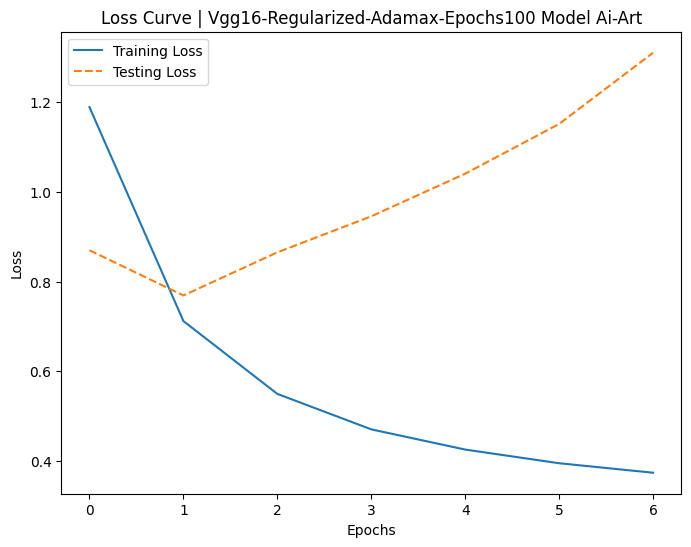

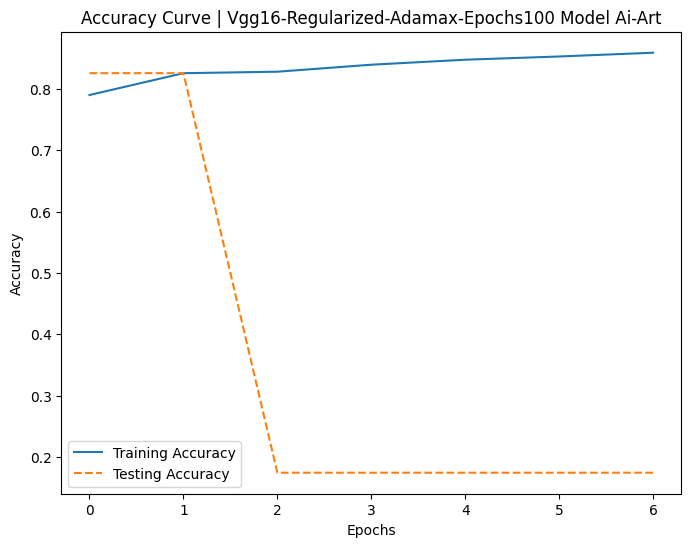

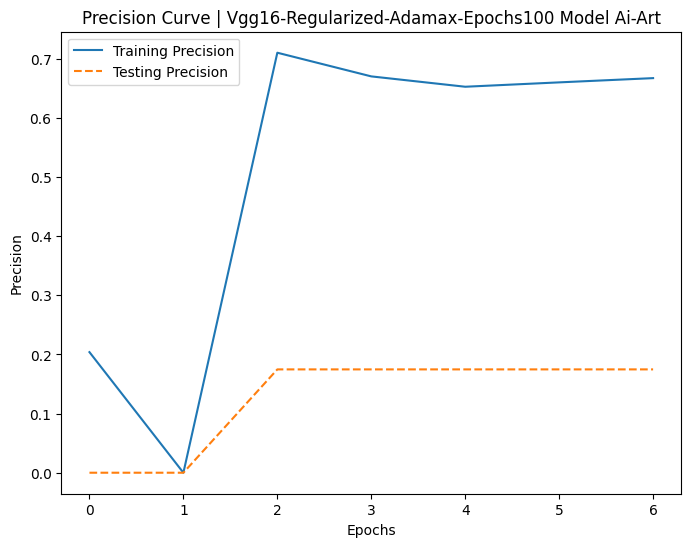

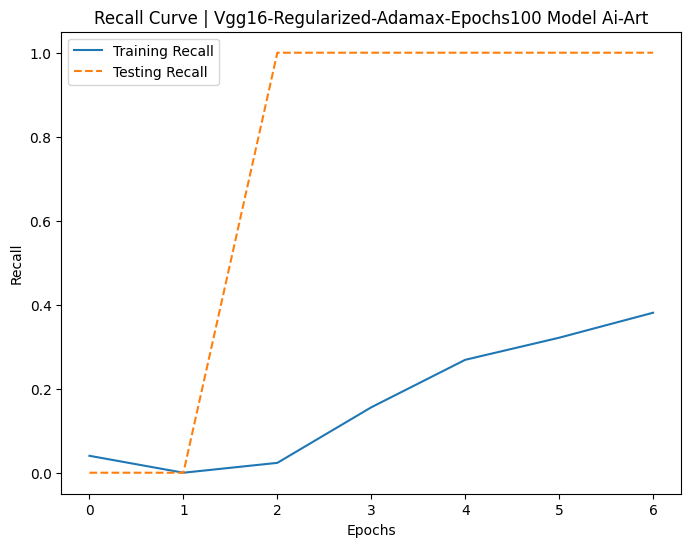

In [26]:
# Plot performance curves
plot_performance_curves(history, model_name)

In [29]:
len('Raipur railway station')

22